### Método de Box-Muller
(p 445-446 del libro A First Course in Probability - Sheldon Ross)


El método de Box Muller es utilizado para generar números aleatorios normales, indepedientes y estándares usando una fuente de números aleatorios con distirbución uniformes. Existen dos formas de generar este tipo de números, una de ellas es la forma básica, en la que simplemente se sigue con el desarrollo que se explicará a continuación, y la otra es con el método polar, que se explicará a medida que desarrollemos el código. La diferencia con la formulación básica es que el método polar busca generar estas variables dentro de un círculo de radio unidad y con ello mejorar la efictividad del método.

Se parte de dos variables X Y con características como las que buscamos, y definimos dos variables nuevas $R^2$ y $tan(\theta)$ de la siguiente forma:

<center> 
$R^2=X^2+Y^2$
</center>

<center> 
$tan(\theta)=\frac{Y}{X}$
</center>

Como las variables X Y son independientes, entonces la función probabilidad conjunta $f(X,Y)$ satifase que


<center>
$f(X,Y)=f(X)f(Y)$
</center>

Es decir que 

<center>
$f(X,Y)=\frac{1}{\sqrt{2\pi}}exp(\frac{-X^2}{2})\frac{1}{\sqrt{2\pi}}exp(\frac{-Y^2}{2})=\frac{1}{2\pi}exp(\frac{-R^2}{2})$
</center>

Usando el teorema de cambio de variables se puede calcular la función distribución de probabilidad conjunta de $R^2$ y $\theta$

<center>
$f(R^2,\theta)=\frac{1}{2}\frac{1}{2\pi}exp(\frac{-R^2}{2})$
</center>

Esta nueva función la podemos pensar como el producto de una districuón de probabilidad exponencial con media 2 y otra uniforme entre 0 y $2\pi$. Entonces, sorteando $R^2$ y $\theta$ y usando las relaciones inversas entre las variables, podemos generar las variables X Y que buscamos.

Ahora bien, en el Proceso de Poisson vimos que se puede generar números aleatorios de unas distribución exponencial usando como fuente los de una distribución uniforme. Es así como, en definitiva, estaríamos generando pared de números aleatorios normales, estándares e independientes de solo sortear números con distribuciones uniformes.

A diferencia de la formulación básica, el método polar busca generar estas variables dentro de un círculo de radio unidad y con ello mejorar la efictividad del método.









In [48]:
from random import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

pi = 4*np.arctan(1)

Veamos como es la formulación básica. Usamos el generador de números aleatorios con distribución exponencial que construimos en el proceso de poisson y construimos otro que genere aleatorios de una distribución uniforme.

In [49]:
m = 1e6
m = int(m)

lista_X = []
lista_Y = []

for i in range(m):
    
    U1 = random()   #U1 y U2 ahora son generador a partir de una disstribución uniforme entre 0 y 1
    U2 = random()
    
    R = (-2*np.log(U1))**0.5
    T = 2*pi*U2
    
    X = R*np.cos(T)
    Y = R*np.sin(T)
    
    lista_X.append(X)
    lista_Y.append(Y)

Hacemos un histograma para la variable X

Text(0.5, 1.0, 'DIstribución normal estándar hecho con sorteo de varibales uniformes')

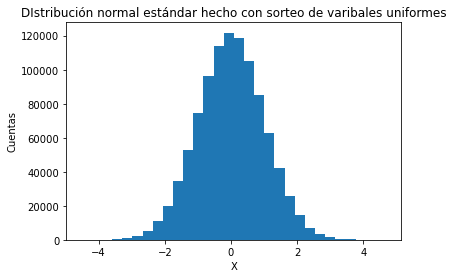

In [50]:
plt.hist(lista_X, bins= 30)
plt.xlabel('X')
plt.ylabel('Cuentas')
plt.title('DIstribución normal estándar hecho con sorteo de varibales uniformes')

Veamos ahora la forma de generar X Y dentro de un circulo de radio unidad. Esto hará que el proceso sea más eficiente

In [51]:
lista_X_nuevo = []
lista_Y_nuevo = []

for j in range(m):
    
    U1 = random()
    U2 = random()
    
    V1=(2*U1)-1    #V1 y V2 ahora son dos variables con distribución uniforme de -1 a 1
    V2=(2*U2)-1
    
    S = (V1*V1)+(V2*V2)
    
    if S <= 1:
        
#ahora nos queda definir R y tita nuevos
#sabemos que cos(tita)=V1/R y sen(tita)=V2/R
#si definimos a R=(S)**0.5 vemos que ahora R^2 es de distribución uniforme entre 0 y 1
        
        R_nuevo = (S)**0.5
        cos_T = V1/(R_nuevo)
        sen_T = V2/(R_nuevo)
        
        X_nuevo =  (((-2*np.log(S))**0.5))*cos_T
        Y_nuevo =  (((-2*np.log(S))**0.5))*sen_T
        
        lista_X_nuevo.append(X_nuevo)
        lista_Y_nuevo.append(Y_nuevo)


Text(0.5, 1.0, 'Distribución normal estándar hecho con método eficiente')

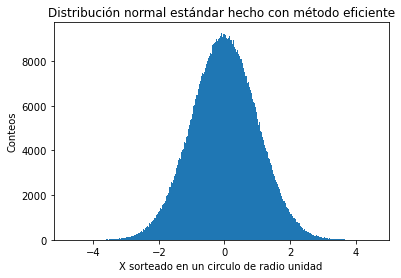

In [52]:
plt.hist(lista_X_nuevo, bins = 'fd')
plt.xlabel('X sorteado en un circulo de radio unidad')
plt.ylabel('Conteos')
plt.title('Distribución normal estándar hecho con método eficiente')

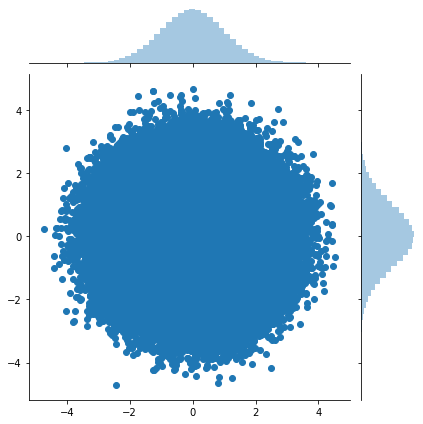

In [53]:
sns.jointplot(lista_X_nuevo,lista_Y_nuevo)


Comparemos la variable X calculada de la forma eficiente con una variable X normal estándar teórica

In [54]:
lista_X_nuevo.sort()   #primero ordenamos los valores obtenidos de nuestro sorteo
len(lista_X_nuevo)

785664

Ahora calculamos valores correspondientes a los de distribución normal estándar teórica usando los cuantiles  

In [55]:
lista_X_teorico = []
for i in range (len(lista_X_nuevo)):
    X_teorico = st.norm.ppf((i+1)/(len(lista_X_nuevo)), loc = 0)
    lista_X_teorico.append(X_teorico)

In [56]:
len(lista_X_teorico)

785664

Text(0.5, 1.0, 'Comparación entre la variable X teórica y la empirica calculada con la formulación básica')

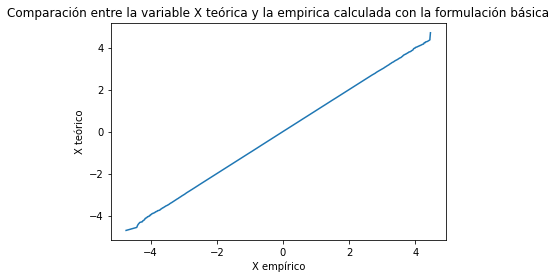

In [57]:
plt.plot(lista_X_nuevo, lista_X_teorico)
plt.ylabel('X teórico')
plt.xlabel('X empírico')
plt.title('Comparación entre la variable X teórica y la empirica calculada con la formulación básica')

Ahora comparemos la otra variable X calculada al principio (no de la forma eficiente) con la variable teórica

In [58]:
lista_X.sort()
len(lista_X)

1000000

In [59]:
lista2_X_teorico = []
for i in range (len(lista_X)):
    X2_teorico = st.norm.ppf((i+1)/len(lista_X), loc = 0)
    lista2_X_teorico.append(X2_teorico)

Text(0.5, 1.0, 'Comparación entre la variable X teórica y la empírica calculada con la forma eficiente')

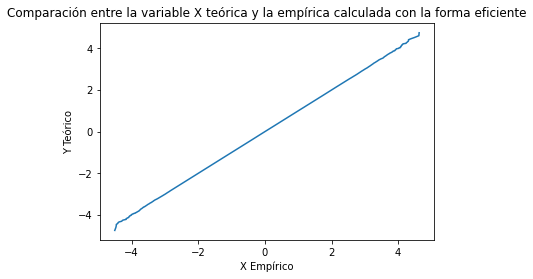

In [60]:
plt.plot(lista_X, lista2_X_teorico)
plt.xlabel('X Empírico')
plt.ylabel('Y Teórico')
plt.title('Comparación entre la variable X teórica y la empírica calculada con la forma eficiente')


Vemos que las comparaciones nos muestran que la relación entre las variables empíricas X y la teórica es practicamente lineal, lo que nos indica que son buenos generadores.

Analicemos entonces por último el tiempo de generación de números aleatorios de cada uno.

In [67]:
%time X_nuevos = lista_X_nuevo       #son la lista de variables X generadas con el método eficiente

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [68]:
%time X = lista_X                   #es la lista de variables X generadas con el método básico

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10 µs


Vemos que la diferencia no es mucha pero alcanza para darnos cuenta que la generación de variables con el método eficiente es más rápida que la generación con el método tradicional. 